Language modeling is the task of fitting a model to a corpus, which can be domain specific. All popular transformer based models are trained using a variant of language modeling, e.g. BERT with masked language modeling, GPT-2 with causal language modeling.

# Installing Dependencies

In order to get started, we will install the `transformers` library that we will use to load any pretrained huggingface model.

We will then clone the huggingface transformers repository. The repo contains many examples using pytorch & tensorflow frameworks that will help us get started in writing our one code to finetune a GPT2 text generation model.

In [1]:
#!pip install transformers
#!git clone https://github.com/huggingface/transformers
#!pip install -r requirements.txt

In [2]:
import warnings
warnings.filterwarnings("ignore")

import logging, sys
logging.disable(sys.maxsize)

# Masked Language Modeling

Masked language modeling is the task of masking tokens in a sequence with a masking token, and prompting the model to fill that mask with an appropriate token. This allows the model to attend to both the right context (tokens on the right of the mask) and the left context (tokens on the left of the mask). Such a training creates a strong basis for downstream tasks requiring bi-directional context such as SQuAD (question answering).

**GPT2 doesn't support masked languaded modeling.**

**Here is the list of models that support masked languaged modeling:** https://huggingface.co/models?pipeline_tag=fill-mask&sort=downloads

### Bert Based Masked Language Modeling

* `BERT` or Bidirectional Encoder Representations from Transformers is a revolutionary technique developed by `Google` that achieved state-of-the-art results on a range of NLP tasks while relying on unannotated text drawn from the web, as opposed to a language corpus that’s been labeled specifically for a given task. The technique has since become popular both as an NLP research baseline and as a final task architecture. 

    BERT’s state-of-the-art performance is based on two things. First, novel pre-training tasks called **Masked Language Model(MLM)** and **Next Sentense Prediction (NSP)**. Second, a lot of data and compute power to train BERT.

    * **MLM** makes it possible to perform bidirectional learning from the text, i.e. it allows the model to learn the context of each word from the words appearing both before and after it. The MLM pre-training task converts the text into tokens and uses the token representation as an input and output for the training. A random subset of the tokens (15%) are masked, i.e. hidden during the training, and the objective function is to predict the correct identities of the tokens.

    * The **NSP** task allows BERT to learn relationships between sentences by predicting if the next sentence in a pair is the true next or not. For this 50% correct pairs are supplemented with 50% random pairs and the model trained. BERT trains both MLM and NSP objectives simultaneously.
    
    More about how BERT works: [BERT Neural Network - EXPLAINED](https://www.youtube.com/watch?v=xI0HHN5XKDo)


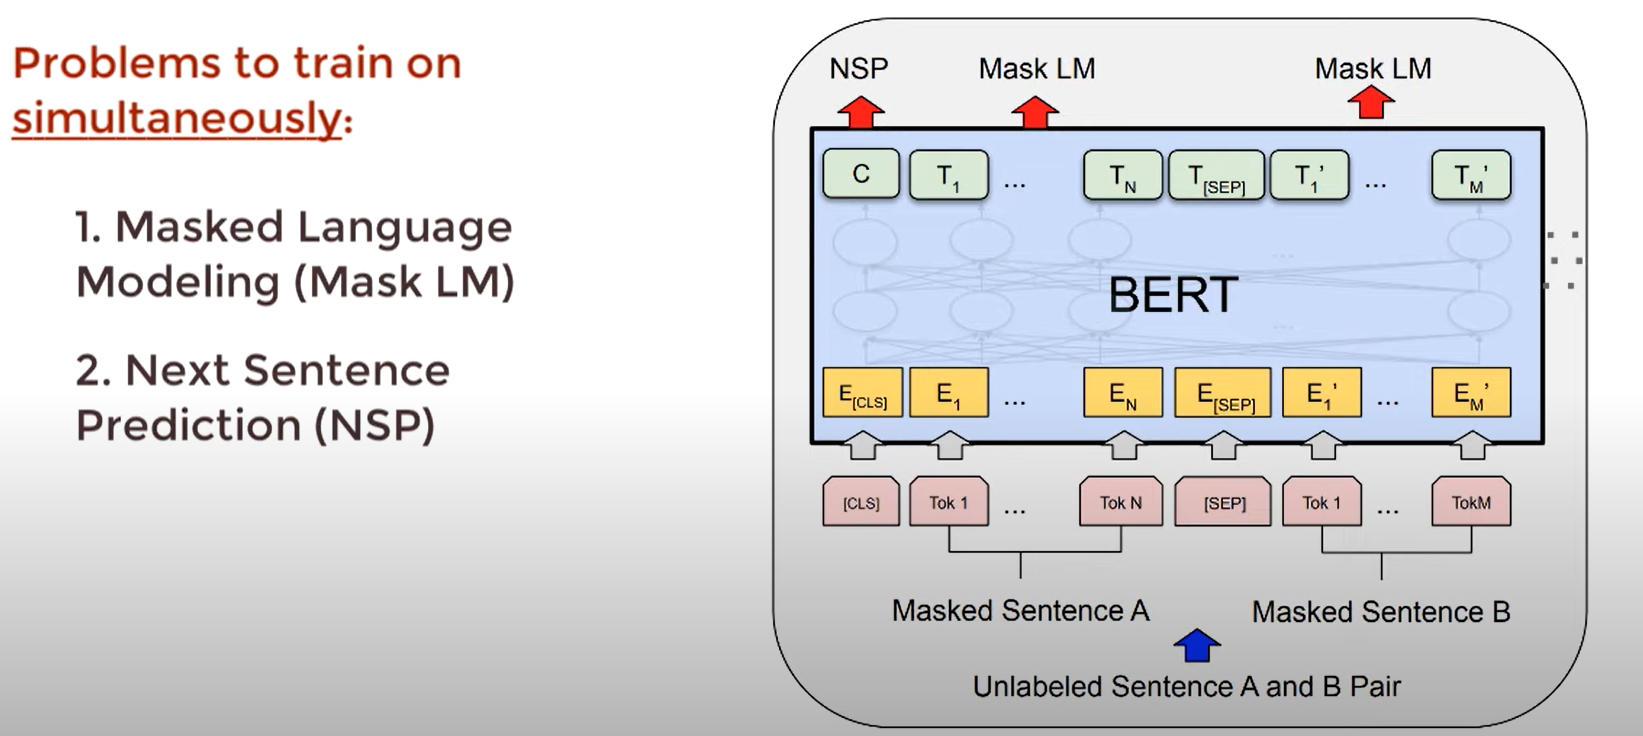

BERT can then be fine-tuned and used over different kinds of NLP problems like Question Answering, etc...

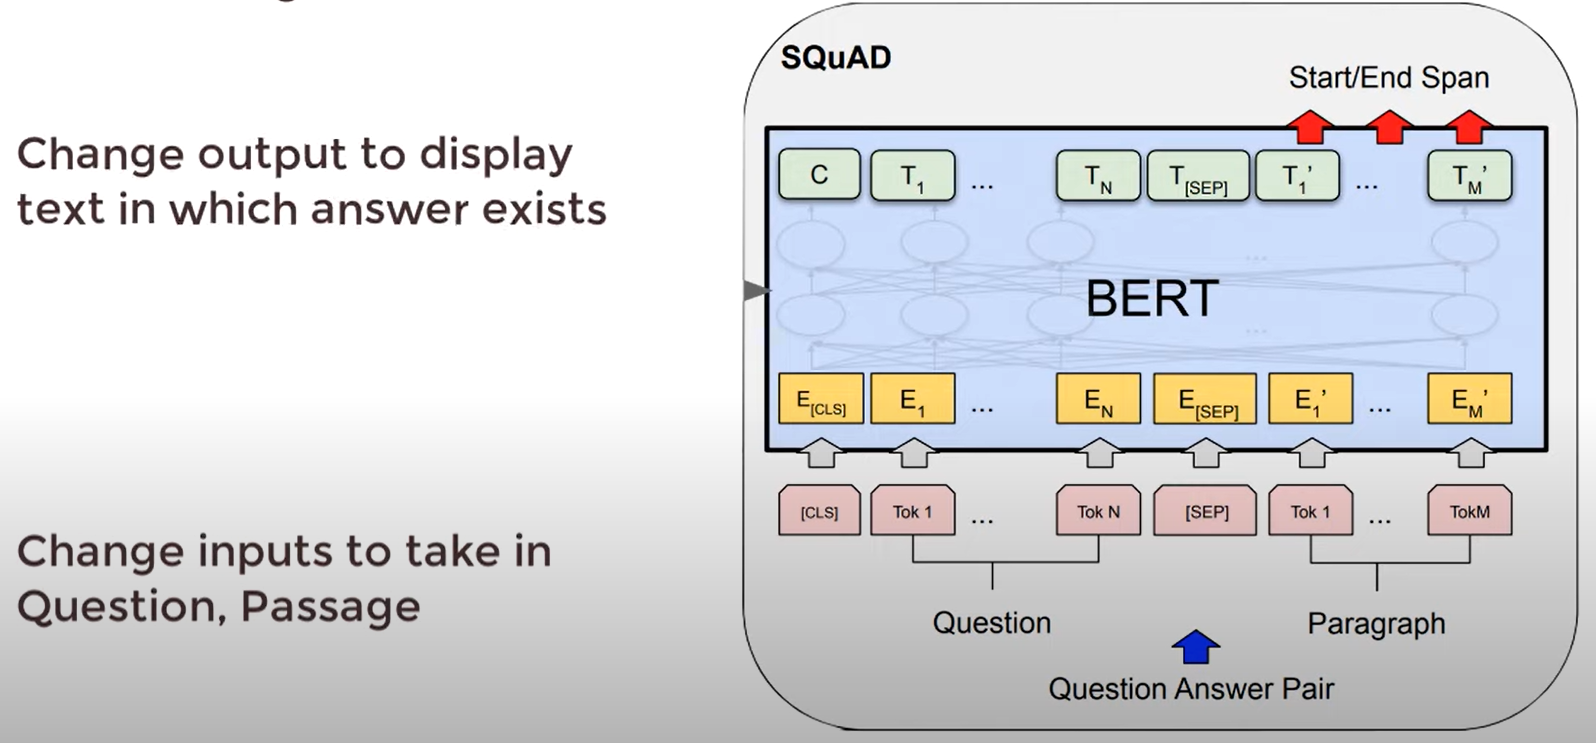

* `DistilBERT` learns a distilled (approximate) version of BERT, retaining 97% performance but using only half the number of parameters [paper](https://arxiv.org/abs/1910.01108).
DistilBERT uses a technique called distillation, which approximates the Google’s BERT, i.e. the large neural network by a smaller one. The idea is that once a large neural network has been trained, its full output distributions can be approximated using a smaller network.

**Note that BERT models are primarily aimed at being fine-tuned on tasks that use the whole sentence (potentially masked) to make decisions, such as sequence classification, token classification or question answering. For tasks such as text generation you should look at model like GPT2.**

**HuggingFace offers the following versions of BERT model:**

* bert-base-cased: 
    * Case-sensitive: it makes a difference between english and English.
    * Training data: The BERT model was pretrained on BookCorpus, a dataset consisting of 11,038 unpublished books and English Wikipedia (excluding lists, tables and headers).
* bert-base-uncased: 
    * Case-insensitive: it does not make a difference between english and English.
* bert-large-cased: 
    * Larger model: with the following configuration: 24-layer, 1024 hidden dimension, 16 attention heads, 336M parameters. 
    * Case-sensitive: it makes a difference between english and English.
* bert-large-uncased: 
    * Larger model: with the following configuration: 24-layer, 1024 hidden dimension, 16 attention heads, 336M parameters. 
    * Case-insensitive: it does not make a difference between english and English.
* distilbert-base-uncased:
    * smaller and faster than BERT, which was pretrained on the same corpus.
* bert-base-multilingual-cased: 
    * The BERT model was pretrained on the 104 languages with the largest Wikipedias. You can find the complete list [here](https://github.com/google-research/bert/blob/master/multilingual.md#list-of-languages).
* More: https://huggingface.co/models?pipeline_tag=fill-mask&search=bert&p=0

In [3]:
from transformers import pipeline

mask_lm = pipeline(task = "fill-mask", model="bert-base-cased")

print("Model: bert-model-base")
print("Tokenizer: ", mask_lm.tokenizer)

sequences = [f"Microsoft is an innovative {mask_lm.tokenizer.mask_token}",
             f"Microsoft is creating a new [MASK]",
             f"Microsoft's corporate [MASK] is to empower every person and every organization on the planet to achieve more!",
             f"[MASK]"]

for sequence in sequences:
    result = sorted(mask_lm(sequence), key=lambda k: k['score'], reverse=True) 
    print('\n'+'\n'.join('Text: {} \t Score: {}'.format(item["sequence"], round(item["score"], 4)) for item in result))

Model: bert-model-base
Tokenizer:  PreTrainedTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

Text: Microsoft is an innovative. 	 Score: 0.86
Text: Microsoft is an innovative ; 	 Score: 0.0792
Text: Microsoft is an innovative! 	 Score: 0.0092
Text: Microsoft is an innovative? 	 Score: 0.0028
Text: Microsoft is an innovative company 	 Score: 0.0026

Text: Microsoft is creating a new. 	 Score: 0.7504
Text: Microsoft is creating a new ; 	 Score: 0.0604
Text: Microsoft is creating a new! 	 Score: 0.0244
Text: Microsoft is creating a new website 	 Score: 0.014
Text: Microsoft is creating a new? 	 Score: 0.0079

Text: Microsoft's corporate vision is to empower every person and every organization on the planet to achieve more! 	 Score: 0.3414
Text: Microsoft's corporate mission is to empower ever

In [4]:
from transformers import pipeline

mask_lm = pipeline(task = "fill-mask", model="bert-base-multilingual-cased")

print("Model: bert-base-multilingual-cased")
print("Tokenizer: ", mask_lm.tokenizer)

sequences = [f"Je vais {mask_lm.tokenizer.mask_token}", 
             f"Ce film est [MASK]",
             f"La vie est [MASK]",
             f"Je ne sais pas comment [MASK]",
             f"Bonjour, comment [MASK] vous?", 
             f"Microsoft crée un nouveau [MASK]",
             f"La [MASK] d'entreprise de Microsoft est de permettre à chaque personne et à chaque organisation de la planète d'en faire plus"]
    
for sequence in sequences:
    result = sorted(mask_lm(sequence), key=lambda k: k['score'], reverse=True) 
    print('\n'+'\n'.join('Text: {} \t Score: {}'.format(item["sequence"], round(item["score"], 4)) for item in result))

Model: bert-base-multilingual-cased
Tokenizer:  PreTrainedTokenizerFast(name_or_path='bert-base-multilingual-cased', vocab_size=119547, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

Text: Je vais. 	 Score: 0.3877
Text: Je vais, 	 Score: 0.3411
Text: Je vais : 	 Score: 0.0208
Text: Je vais! 	 Score: 0.0104
Text: Je vais ; 	 Score: 0.008

Text: Ce film est : 	 Score: 0.4592
Text: Ce film est de 	 Score: 0.0731
Text: Ce film est sorti 	 Score: 0.0582
Text: Ce film est film 	 Score: 0.027
Text: Ce film est. 	 Score: 0.0104

Text: La vie est libre 	 Score: 0.0534
Text: La vie est : 	 Score: 0.0462
Text: La vie est. 	 Score: 0.0412
Text: La vie est écrite 	 Score: 0.036
Text: La vie est - 	 Score: 0.0217

Text: Je ne sais pas comment. 	 Score: 0.7236
Text: Je ne sais pas comment, 	 Score: 0.0502
Text: Je ne sais pas comment? 	 Score: 0.0118
Text: Je ne sa

#### BERT For Next Sentence Prediction

Next Sentence Prediction doesn't mean BERT Can take 1 sentence and generate a second sentence related to the first. Instead, it takes 2 sentences and predicts whether sentence 2 is a continuation of sentence 1 or randomly generated.

Here's how we can use BERT for Next Sentence Prediction with NLP.

In [5]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForNextSentencePrediction

# load pretrained model and a pretrained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = TFBertForNextSentencePrediction.from_pretrained('bert-base-cased')

seq_A = "In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced."
seq_B = "The sky is blue due to the shorter wavelength of blue light."

# encode the two sequences. Particularly, make clear that they must be 
# encoded as "one" input to the model by using 'seq_B' as the 'text_pair'
encoding = tokenizer(seq_A, seq_B, return_tensors='tf')

# a model's output is a tuple, we only need the output tensor containing
# the relationships which is the first item in the tuple
logits = model(encoding['input_ids'], token_type_ids=encoding['token_type_ids'])[0]

# we still need softmax to convert the logits into probabilities
# index 0: sequence B is a continuation of sequence A
# index 1: sequence B is a random sequence
probs = tf.nn.softmax(logits)

print("Probability sequence B is a continuation of sequence A:", round(probs[0][0].numpy(), 4))
print("Probability sequence B is a random sequence:", round(probs[0][1].numpy(), 4))
assert probs[0][0] < probs[0][1] # the next sentence was random

Probability sequence B is a continuation of sequence A: 0.006
Probability sequence B is a random sequence: 0.994


In [6]:
seq_A = 'I like cookies !'
seq_B = 'Do you like them ?'

# encode the two sequences. Particularly, make clear that they must be 
# encoded as "one" input to the model by using 'seq_B' as the 'text_pair'
encoding = tokenizer(seq_A, seq_B, return_tensors='tf')

# a model's output is a tuple, we only need the output tensor containing
# the relationships which is the first item in the tuple
logits = model(encoding['input_ids'], token_type_ids=encoding['token_type_ids'])[0]

# we still need softmax to convert the logits into probabilities
# index 0: sequence B is a continuation of sequence A
# index 1: sequence B is a random sequence
probs = tf.nn.softmax(logits)

print("Probability sequence B is a continuation of sequence A:", round(probs[0][0].numpy(), 4))
print("Probability sequence B is a random sequence:", round(probs[0][1].numpy(), 4))
assert probs[0][0] > probs[0][1] # the next sentence was random

Probability sequence B is a continuation of sequence A: 0.9999
Probability sequence B is a random sequence: 1e-04


### RoBERTa Masked Language Model: 

By default, the model used by the fill-mask language modeling is called `distilroberta-base`.

* `RoBERTa` introduced at `Facebook`, Robustly optimized BERT approach RoBERTa, is a retraining of BERT with improved training methodology, 1000% more data and compute power. It builds on BERT’s language masking strategy, wherein the system learns to predict intentionally hidden sections of text within otherwise unannotated language examples. RoBERTa, which was implemented in PyTorch, modifies key hyperparameters in BERT, including removing BERT’s next-sentence pretraining objective, and training with much larger mini-batches and learning rates. This allows RoBERTa to improve on the masked language modeling objective compared with BERT and leads to better downstream task performance. We also explore training RoBERTa on an order of magnitude more data than BERT, for a longer amount of time.

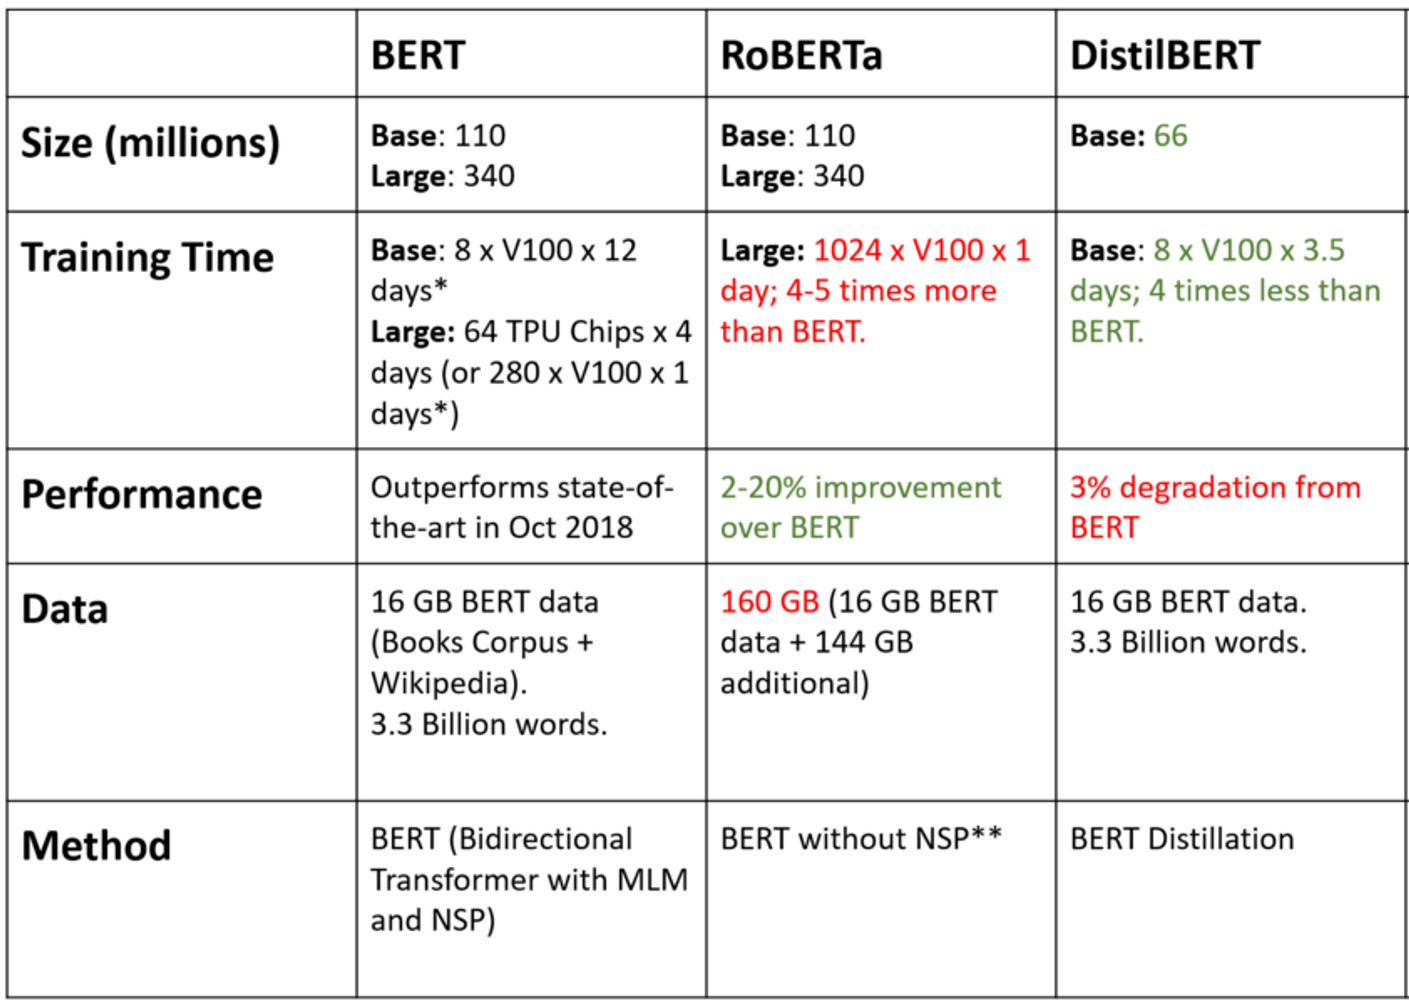

* `distilRoBERTa` base model is a distilled version of the RoBERTa-base model. DistilRoBERTa was pre-trained on OpenWebTextCorpus, a reproduction of OpenAI's WebText dataset (it is ~4 times less training data than the teacher RoBERTa).

**HuggingFace offers the following versions of RoBERTa model:**

* roberta-base: 
    * RoBERTa base model. 
    * Case-sensitive: it makes a difference between english and English.
    * Training data: The RoBERTa model was pretrained on the reunion of five datasets:
        * BookCorpus, a dataset consisting of 11,038 unpublished books;
        * English Wikipedia (excluding lists, tables and headers) ;
        * CC-News, a dataset containing 63 millions English news articles crawled between September 2016 and February 2019.
        * OpenWebText, an opensource recreation of the WebText dataset used to train GPT-2,
        * Stories a dataset containing a subset of CommonCrawl data filtered to match the story-like style of Winograd schemas.
* roberta-large: 
    * Probably a larger model.
    * Case-sensitive: it makes a difference between english and English.
* distilroberta-base: a distilled version of the RoBERTa-base model.

In [7]:
from transformers import pipeline

mask_lm = pipeline(task = "fill-mask")

print("Model: distilroberta-base")
print("Tokenizer: ", mask_lm.tokenizer)

sequences = [f"Microsoft is an innovative {mask_lm.tokenizer.mask_token}",
             f"Microsoft is creating a new <mask>",
             f"Microsoft’s corporate <mask> is to empower every person and every organization on the planet to achieve more!",
             f"<s> <mask>"]
    
for sequence in sequences:
    result = sorted(mask_lm(sequence), key=lambda k: k['score'], reverse=True) 
    print('\n'+'\n'.join('Text: {} \t Score: {}'.format(item["sequence"], round(item["score"], 4)) for item in result))

Model: distilroberta-base
Tokenizer:  PreTrainedTokenizerFast(name_or_path='distilroberta-base', vocab_size=50265, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})

Text: Microsoft is an innovative company 	 Score: 0.2983
Text: Microsoft is an innovative startup 	 Score: 0.1576
Text: Microsoft is an innovative business 	 Score: 0.0338
Text: Microsoft is an innovative enterprise 	 Score: 0.027
Text: Microsoft is an innovative platform 	 Score: 0.026

Text: Microsoft is creating a new browser 	 Score: 0.0465
Text: Microsoft is creating a new Xbox 	 Score: 0.0461
Text: Microsoft is creating a new API 	 Score: 0.0381
Text: Microsoft is creating a new platform 	 Score: 0.0342
Text: Microsoft is creating a new cloud 	 Score: 0.0334

Text: Microsof

In [8]:
from transformers import pipeline

mask_lm = pipeline(task = "fill-mask", model="roberta-base")

print("Model: roberta-base")
print("Tokenizer: ", mask_lm.tokenizer)

sequences = [f"Microsoft is an innovative {mask_lm.tokenizer.mask_token}",
             f"Microsoft is creating a new <mask>",
             f"Microsoft’s corporate <mask> is to empower every person and every organization on the planet to achieve more!",
             f"<s> <mask>"]
    
for sequence in sequences:
    result = sorted(mask_lm(sequence), key=lambda k: k['score'], reverse=True) 
    print('\n'+'\n'.join('Text: {} \t Score: {}'.format(item["sequence"], round(item["score"], 4)) for item in result))

Model: roberta-base
Tokenizer:  PreTrainedTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})

Text: Microsoft is an innovative company 	 Score: 0.7778
Text: Microsoft is an innovative business 	 Score: 0.0232
Text: Microsoft is an innovative leader 	 Score: 0.0174
Text: Microsoft is an innovative enterprise 	 Score: 0.0145
Text: Microsoft is an innovative force 	 Score: 0.0141

Text: Microsoft is creating a new Xbox 	 Score: 0.0787
Text: Microsoft is creating a new industry 	 Score: 0.0391
Text: Microsoft is creating a new world 	 Score: 0.0383
Text: Microsoft is creating a new company 	 Score: 0.0363
Text: Microsoft is creating a new cloud 	 Score: 0.026

Text: Microsoft’s corporate

**The RoBERTa model seems very powerful in the masked language modeling.**

There are 2 different ways to use models from HuggingFace. 

We can use the pipeline class providing it with the task and model name which could be limited. The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering. See the task summary for examples of use: https://huggingface.co/transformers/main_classes/pipelines.html

Or we can use Model specific classes to get more control and extract the different features of a given text: https://huggingface.co/transformers/model_doc/roberta.html#tfrobertaformaskedlm

Here's how we can use a pretrained RoBERTA model with TFRobertaForMaskedLM:

In [9]:
from transformers import RobertaTokenizer, TFRobertaForMaskedLM, tf_top_k_top_p_filtering
import tensorflow as tf
import numpy as np

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = TFRobertaForMaskedLM.from_pretrained("roberta-base")

print("Model: roberta-base")
print("Tokenizer: ", tokenizer)

text = "Microsoft is an innovative"
text_with_mask = text + "<mask>"

encoded_input = tokenizer(text_with_mask, return_tensors='tf')
output = model(encoded_input)

# masked token logit
masked_token_logits = model(encoded_input)[0][:, -2, :]

# Filter a distribution of logits using top-k  
# This function will filter the logits and chooses indices with top values
# The function will transform all other indices to -inf
filtered_masked_token_logits = tf_top_k_top_p_filtering(masked_token_logits, top_k=10)

# Get the indices that are not -inf (are positive)
masked_tokens = tf.where(filtered_masked_token_logits[0] > -np.inf)

generated_texts = []
for masked_token in masked_tokens:
    masked_text = tokenizer.decode(tf.reshape(masked_token, shape=(1, 1)).numpy().tolist()[0])
    generated_texts.append({"Text": text + masked_text, "Probability": round(tf.nn.softmax(masked_token_logits)[0, masked_token.numpy()[0]].numpy(), 4)})

for item in sorted(generated_texts, key=lambda k: k['Probability'], reverse=True):
    print(item)

Model: roberta-base
Tokenizer:  PreTrainedTokenizer(name_or_path='roberta-base', vocab_size=50265, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'sep_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'cls_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True)})
{'Text': 'Microsoft is an innovative company', 'Probability': 0.7778}
{'Text': 'Microsoft is an innovative business', 'Probability': 0.0232}
{'Text

### CamemBERT Masked Language Modeling

`CamemBERT` is a state-of-the-art language model for French based on the RoBERTa model.

It is now available on Hugging Face in 6 different versions with varying number of parameters, amount of pretraining data and pretraining data source domains.


|Model|params|Arch.|Training data|
|-------|-------|-------|-------|
|camembert-base|110M|Base|OSCAR (138 GB of text)|
|camembert/camembert-large|335M|Large|CCNet (135 GB of text)|
|camembert/camembert-base-ccnet|110M|Base|CCNet (135 GB of text)|
|camembert/camembert-base-wikipedia-4gb|110M|Base|Wikipedia (4 GB of text)|
|camembert/camembert-base-oscar-4gb|110M|Base|Subsample of OSCAR (4 GB of text)|
|camembert/camembert-base-ccnet-4gb|110M|Base|Subsample of CCNet (4 GB of text)|


In [10]:
from transformers import pipeline

mask_lm = pipeline(task = "fill-mask", model="camembert-base")

print("Model: camembert-base")
print("Tokenizer: ", mask_lm.tokenizer)

sequences = [f"Je vais {mask_lm.tokenizer.mask_token}", 
             f"Ce film est <mask>",
             f"La vie est <mask>",
             f"Je ne sais pas comment <mask>",
             f"Bonjour, comment <mask> vous?", 
             f"Microsoft crée un nouveau <mask>",
             f"La <mask> d'entreprise de Microsoft est de permettre à chaque personne et à chaque organisation de la planète d'en faire plus",
             f"Paris est la <mask>",
             f"<s> <mask>"]

for sequence in sequences:
    result = sorted(mask_lm(sequence), key=lambda k: k['score'], reverse=True) 
    print('\n'+'\n'.join('Text: {} \t Score: {}'.format(item["sequence"], round(item["score"], 4)) for item in result))

Model: camembert-base
Tokenizer:  PreTrainedTokenizerFast(name_or_path='camembert-base', vocab_size=32005, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False), 'additional_special_tokens': ['<s>NOTUSED', '</s>NOTUSED']})

Text: Je vais... 	 Score: 0.1847
Text: Je vais essayer 	 Score: 0.0813
Text: Je vais bien 	 Score: 0.0266
Text: Je vais voir 	 Score: 0.0256
Text: Je vais [...] 	 Score: 0.0246

Text: Ce film est... 	 Score: 0.4201
Text: Ce film est [...] 	 Score: 0.0559
Text: Ce film est un 	 Score: 0.0547
Text: Ce film est : 	 Score: 0.0507
Text: Ce film est une 	 Score: 0.0275

Text: La vie est belle 	 Score: 0.2689
Text: La vie est courte 	 Score: 0.2189
Text: La vie est... 	 Score: 0.0767
Text: La vie est longue 	 Score: 0.0341
Text: La vie

## Causal Language Modeling

Causal language modeling is the task of predicting the token following a sequence of tokens. In this situation, the model only attends to the left context (tokens on the left of the mask). Such a training is particularly interesting for generation tasks.

Usually, the next token is predicted by sampling from the logits of the last hidden state the model produces from the input sequence.

The `GPT2` model is pretrained on a large english corpus. There are many other pretrained models that we can to generate the next token: https://huggingface.co/models?pipeline_tag=text-generation&sort=downloads

### Next Token Generation

Here is an example using the tokenizer and model and leveraging the top_k_top_p_filtering() method to sample the next token following an input sequence of tokens from the pre-trained `GPT2` model.

In [11]:
from transformers import TFAutoModelWithLMHead, AutoTokenizer, tf_top_k_top_p_filtering
import tensorflow as tf
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = TFAutoModelWithLMHead.from_pretrained("gpt2")

print("Model: gpt2")
print("Tokenizer: ", tokenizer)

sequences = [f"Microsoft is an innovative",
             f"Microsoft is creating a new",
             f"Microsoft’s corporate mission is to",
             f"<|endoftext|>"] # To confirm
 
for sequence in sequences:
    input_ids = tokenizer.encode(sequence, return_tensors="tf")

    # get logits of last hidden state
    next_token_logits = model(input_ids)[0][:, -1, :]

    # filter
    filtered_next_token_logits = tf_top_k_top_p_filtering(next_token_logits, top_k=10)

    # Get the indices that are not -inf (are positive)
    next_tokens = tf.where(filtered_next_token_logits[0] > -np.inf)
        
    generated_texts = []
    for next_token in next_tokens:
        next_text = tokenizer.decode(tf.reshape(next_token, shape=(1, 1)).numpy().tolist()[0])
        generated_texts.append({"Text": sequence + next_text, "Probability": round(tf.nn.softmax(next_token_logits)[0, next_token.numpy()[0]].numpy(), 4)})
    print('\n')
    for item in sorted(generated_texts, key=lambda k: k['Probability'], reverse=True):
        print(item)

Model: gpt2
Tokenizer:  PreTrainedTokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_len=1024, is_fast=True, padding_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'})


{'Text': 'Microsoft is an innovative company', 'Probability': 0.1824}
{'Text': 'Microsoft is an innovative and', 'Probability': 0.0932}
{'Text': 'Microsoft is an innovative technology', 'Probability': 0.0702}
{'Text': 'Microsoft is an innovative,', 'Probability': 0.0651}
{'Text': 'Microsoft is an innovative platform', 'Probability': 0.0459}
{'Text': 'Microsoft is an innovative new', 'Probability': 0.0191}
{'Text': 'Microsoft is an innovative business', 'Probability': 0.0169}
{'Text': 'Microsoft is an innovative way', 'Probability': 0.0145}
{'Text': 'Microsoft is an innovative cloud', 'Probability': 0.0131}
{'Text': 'Microsoft is an innovative product', 'Probability': 0.0121}


{'Text': 'Microsoft is creating a new version', 'Probability':

We can also find a couple of models that has been fine-tuned over a french corpus: https://huggingface.co/models?filter=fr&pipeline_tag=text-generation&sort=downloads

`GPT-fr` is a GPT model for French developped by `Quantmetry` and the `Laboratoire de Linguistique Formelle (LLF)`. They train the model on a very large and heterogeneous French corpus. They release the weights for the following configurations:


|Model name|Number of layers|Attention Heads|Embedding Dimension|Total Parameters|
|-----|---|---|---|---|
|gpt-fr-cased-small|12|12|768|124 M|
|gpt-fr-cased-base|24|14|1,792|1,017 B|

#### Training data

A dedicated corpus to train the generative model was created. Indeed the model uses a fixed-length context size of 1,024 and require long documents to be trained. They aggregated existing corpora: Wikipedia, OpenSubtitle (Tiedemann, 2012), Gutenberg and Common Crawl (Li et al., 2019). Corpora are filtered and separated into sentences. Successive sentences are then concatenated within the limit of 1,024 tokens per document.

In [12]:
from transformers import TFAutoModelWithLMHead, AutoTokenizer, tf_top_k_top_p_filtering
import tensorflow as tf
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("asi/gpt-fr-cased-base")
model = TFAutoModelWithLMHead.from_pretrained("asi/gpt-fr-cased-base")

print("Model: asi/gpt-fr-cased-base")
print("Tokenizer: ", tokenizer)

sequences = [f"Je vais", 
             f"Ce film est un",
             f"La vie est",
             f"Je ne sais pas comment",
             f"Microsoft crée un nouveau",
             f"Paris est une",
             f"<s>"]
 
for sequence in sequences:
    input_ids = tokenizer.encode(sequence, return_tensors="tf")

    # get logits of last hidden state
    next_token_logits = model(input_ids)[0][:, -1, :]

    # filter
    filtered_next_token_logits = tf_top_k_top_p_filtering(next_token_logits, top_k=10)

    # Get the indices that are not -inf (are positive)
    next_tokens = tf.where(filtered_next_token_logits[0] > -np.inf)

    generated_texts = []
    for next_token in next_tokens:
        next_text = tokenizer.decode(tf.reshape(next_token, shape=(1, 1)).numpy().tolist()[0])
        generated_texts.append({"Text": sequence + next_text, "Probability": round(tf.nn.softmax(next_token_logits)[0, next_token.numpy()[0]].numpy(), 4)})
    print('\n')
    for item in sorted(generated_texts, key=lambda k: k['Probability'], reverse=True):
        print(item)

Model: asi/gpt-fr-cased-base
Tokenizer:  PreTrainedTokenizerFast(name_or_path='asi/gpt-fr-cased-base', vocab_size=50000, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'mask_token': '<mask>'})


{'Text': 'Je vais vous', 'Probability': 0.1725}
{'Text': 'Je vais te', 'Probability': 0.0475}
{'Text': 'Je vais donc', 'Probability': 0.0411}
{'Text': 'Je vais être', 'Probability': 0.0326}
{'Text': 'Je vais faire', 'Probability': 0.0302}
{'Text': 'Je vais me', 'Probability': 0.029}
{'Text': 'Je vais essayer', 'Probability': 0.0263}
{'Text': 'Je vais commencer', 'Probability': 0.0188}
{'Text': 'Je vais m', 'Probability': 0.0185}
{'Text': 'Je vais à', 'Probability': 0.0185}


{'Text': 'Ce film est un film', 'Probability': 0.0551}
{'Text': 'Ce film est un documentaire', 'Probability': 0.0527}
{'Text': 'Ce film est un peu', 'Probability': 0.0508}
{'Text': 'Ce fil

### Text Generation with GPT2

Generate a sequence of max length of 30.

In [13]:
from transformers import pipeline

casual_lm = pipeline('text-generation', model='gpt2')

print("Model: gpt2")
print("Tokenizer: ", casual_lm.tokenizer)

sequences = [f"Microsoft is an innovative",
             f"Microsoft is creating a new",
             f"Microsoft’s corporate mission is to",
             f"<|endoftext|>"]
    
for sequence in sequences:
    print("--------------------------------------------------------")
    print("\n" + "\n".join(item['generated_text'] for item in casual_lm(sequence, max_length=50, early_stopping=True, num_return_sequences=1)))

Model: gpt2
Tokenizer:  PreTrainedTokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_len=1024, is_fast=True, padding_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'})
--------------------------------------------------------

Microsoft is an innovative business. This is something you expect from your boss. But when he does something, he doesn't tell you how to improve your workplace.

The difference between this and any other workplace environment is just that most of us are
--------------------------------------------------------

Microsoft is creating a new technology to help the Internet users "take control of their data faster, more seamlessly, and more easily." The new technology helps with the current push between Google and Amazon, but there's still a big difference in how it's
--------------------------------------------------------

Microsoft’s corporate mission is to protect and enhance our comm

More information about text generation parameters: https://huggingface.co/blog/how-to-generate

In [14]:
from transformers import pipeline

casual_lm = pipeline('text-generation', model='asi/gpt-fr-cased-base')

print("Model: asi/gpt-fr-cased-base")
print("Tokenizer: ", casual_lm.tokenizer)

sequences = [f"Je vais", 
             f"Ce film est un",
             f"La vie est",
             f"Je ne sais pas comment",
             f"Microsoft crée un nouveau",
             f"Paris est une",
             f"<s>"]
    
for sequence in sequences:
    print("--------------------------------------------------------")
    print("\n" + "\n".join(item['generated_text'] for item in casual_lm(sequence, min_length =50, num_beams = 5, early_stopping=True, num_return_sequences=1)))

Model: asi/gpt-fr-cased-base
Tokenizer:  PreTrainedTokenizerFast(name_or_path='asi/gpt-fr-cased-base', vocab_size=50000, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'mask_token': '<mask>'})
--------------------------------------------------------

Je vais vous parler aujourd’hui d’un livre que j’ai lu il
--------------------------------------------------------

Ce film est un film d’horreur. C’est un film d’horreur
--------------------------------------------------------

La vie est trop courte pour se faire chier, lancez vous dans une belle rencontre de sexe avec
--------------------------------------------------------

Je ne sais pas comment j’ai fait, mais j’ai eu l’
--------------------------------------------------------

Microsoft crée un nouveau système d’exploitation pour ses ordinateurs. Baptisé Windows 8, il
------------------------------